# COLOR COMPRESSION

# EXAMPLE 1 (FLOWER)

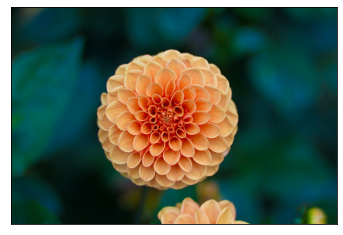

In [1]:
# IMPORTING LIBRARIES AND IMAGE FOR COMPRESSION
from sklearn.datasets import load_sample_image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
china=load_sample_image("flower.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [2]:
# Returns the Dimension of array

china.shape

(427, 640, 3)

In [3]:
china


array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [4]:
# Reshape the data to(n_samples,n_features),and rescale the colors so that they lie betwwn 0 and 1

data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [5]:
# Visualize these pixels in this colors shape , using the subset of 10,000 pixels of efficiency

def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    # Choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker=".")
    ax[0].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker=".")
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);


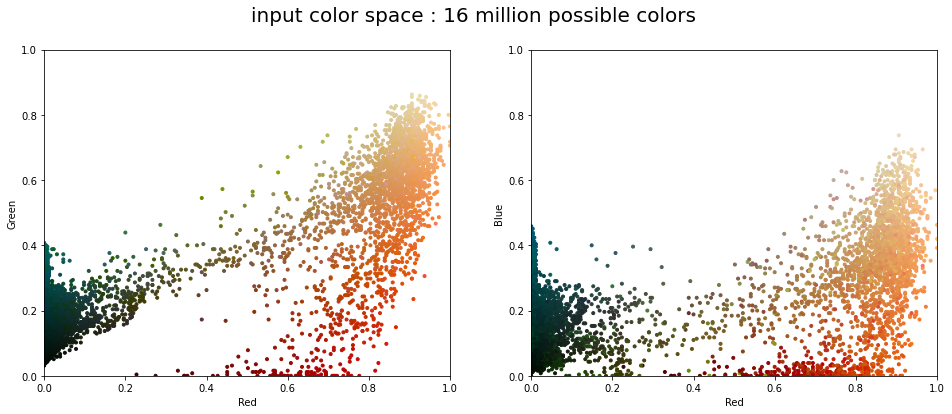

In [6]:
plot_pixels(data,title="input color space : 16 million possible colors ")

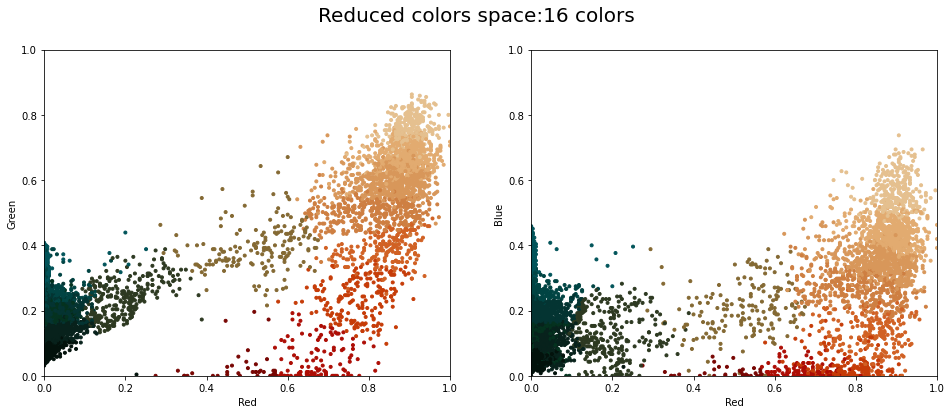

In [7]:
# Fix numpy issues

import warnings; warnings.simplefilter("ignore") #fix Numpy issues


# Reducing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Reduced colors space:16 colors")

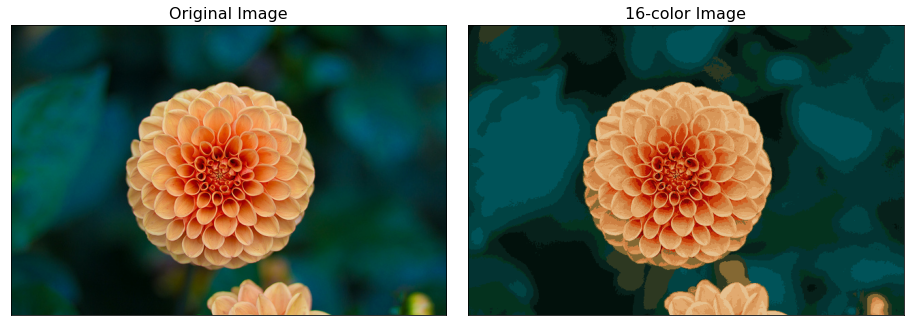

In [8]:
# The result is re-coloring of the original pixels,where each pixel is assigned the colors of its nearest cluster center


china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image",size=16);

# EXAMPLE 2

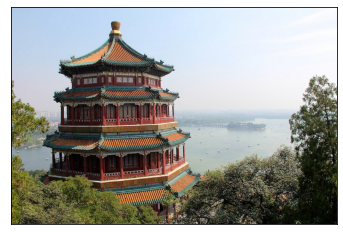

In [9]:
# IMPORTING LIBRARIES AND IMAGE FOR COMPRESSION

from sklearn.datasets import load_sample_image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
china=load_sample_image("china.jpg")
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(china);

In [10]:
# Returns the Dimension of array

china.shape

(427, 640, 3)

In [11]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [12]:
data=china/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [13]:
# Visualize these pixels in this colors shape , using the subset of 10,000 pixels of efficiency

def plot_pixels(data,title,colors=None,N=10000):
    if colors is None:
        colors=data
    # Choose a random subset
    rng=np.random.RandomState(0)
    i=rng.permutation(data.shape[0])[:N]
    colors=colors[i]
    R,G,B=data[i].T
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker=".")
    ax[0].set(xlabel="Red",ylabel="Green",xlim=(0,1),ylim=(0,1))
    ax[1].scatter(R,B,color=colors,marker=".")
    ax[1].set(xlabel="Red",ylabel="Blue",xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);


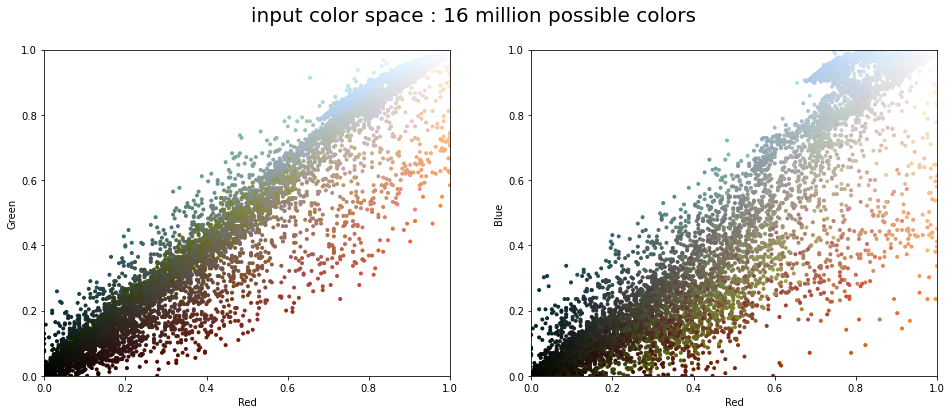

In [14]:
plot_pixels(data,title="input color space : 16 million possible colors ")

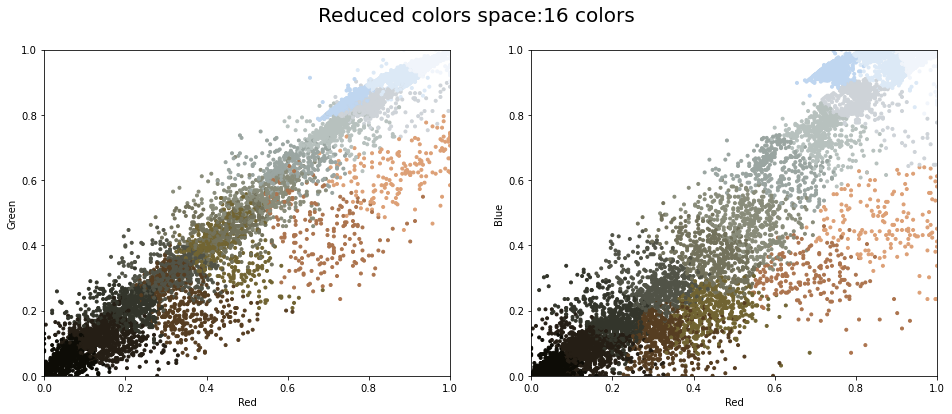

In [15]:
# Fix numpy issues

import warnings; warnings.simplefilter("ignore") #fix Numpy issues


# Reducing these 16 million colors to just 16 colors
from sklearn.cluster import MiniBatchKMeans
kmeans=MiniBatchKMeans(16)
kmeans.fit(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Reduced colors space:16 colors")

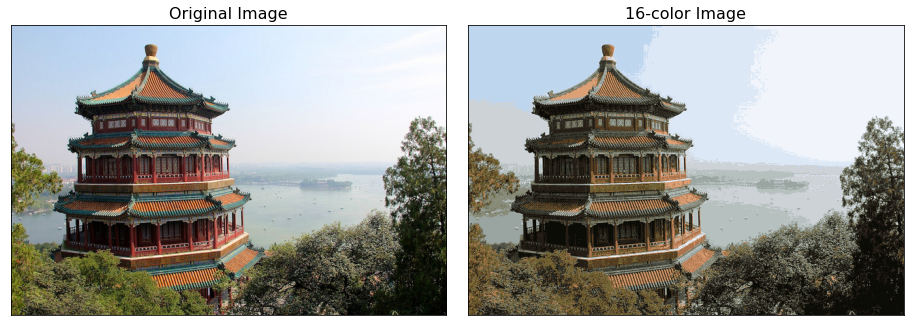

In [16]:
# The result is re-coloring of the original pixels,where each pixel is assigned the colors of its nearest cluster center


china_recolored=new_colors.reshape(china.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title("Original Image",size=16)
ax[1].imshow(china_recolored)
ax[1].set_title("16-color Image",size=16);